In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [21]:
df=pd.read_csv('50_Startups.csv')
df

,rdspend,administration,marketingspend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rdspend         50 non-null     float64
 1   administration  50 non-null     float64
 2   marketingspend  50 non-null     float64
 3   state           50 non-null     object 
 4   profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [23]:
df.isna().sum()

rdspend           0
administration    0
marketingspend    0
state             0
profit            0
dtype: int64

In [24]:
df['state_code']=df.state.factorize()[0]
startup=df.drop(['state'], axis=1)
startup

,rdspend,administration,marketingspend,profit,state_code
0,165349.20,136897.80,471784.10,192261.83,0
1,162597.70,151377.59,443898.53,191792.06,1
2,153441.51,101145.55,407934.54,191050.39,2
3,144372.41,118671.85,383199.62,182901.99,0
4,142107.34,91391.77,366168.42,166187.94,2
5,131876.90,99814.71,362861.36,156991.12,0
6,134615.46,147198.87,127716.82,156122.51,1
7,130298.13,145530.06,323876.68,155752.60,2
8,120542.52,148718.95,311613.29,152211.77,0
9,123334.88,108679.17,304981.62,149759.96,1


In [25]:
startup.corr()

,rdspend,administration,marketingspend,profit,state_code
rdspend,1.000000,0.241955,0.724248,0.972900,0.037930
administration,0.241955,1.000000,-0.032154,0.200717,0.003026
marketingspend,0.724248,-0.032154,1.000000,0.747766,0.137777
profit,0.972900,0.200717,0.747766,1.000000,0.048471
state_code,0.037930,0.003026,0.137777,0.048471,1.000000


## Scatterplot between variables along with histograms

In [26]:
sn.set_style(style='darkgrid')
sn.pairplot(startup)

## Preparing a model

In [27]:
model= smf.ols('profit~rdspend+administration+marketingspend+state_code', data=startup).fit()
model.params

Intercept         50044.735788
rdspend               0.806049
administration       -0.026987
marketingspend        0.027027
state_code          118.514656
dtype: float64

In [28]:
print(model.tvalues, '\n', model.pvalues)

Intercept          7.434432
rdspend           17.568861
administration    -0.522554
marketingspend     1.602332
state_code         0.071850
dtype: float64 
 Intercept         2.322116e-09
rdspend           9.017776e-22
administration    6.038483e-01
marketingspend    1.160794e-01
state_code        9.430398e-01
dtype: float64


## simple linear regression model

In [29]:
ml_a=smf.ols('profit~administration',data=startup).fit()

In [30]:
print(ml_a.tvalues, '\n', ml_a.pvalues)

Intercept         3.040044
administration    1.419493
dtype: float64 
 Intercept         0.003824
administration    0.162217
dtype: float64


In [31]:
ml_m=smf.ols('profit~marketingspend',data=startup).fit()
print(ml_m.tvalues, '\n', ml_m.pvalues)

Intercept         7.808356
marketingspend    7.802657
dtype: float64 
 Intercept         4.294735e-10
marketingspend    4.381073e-10
dtype: float64


In [32]:
ml_s=smf.ols('profit~state_code', data=startup).fit()
print(ml_s.tvalues, '\n', ml_s.pvalues)

Intercept     12.166135
state_code     0.336212
dtype: float64 
 Intercept     2.832242e-16
state_code    7.381764e-01
dtype: float64


## calculating VIF

In [37]:
rsq_rd=smf.ols('rdspend~administration+marketingspend+state_code', data=startup).fit().rsquared
vif_rd=1/(1-rsq_rd)

rsq_a=smf.ols('administration~rdspend+marketingspend+state_code', data=startup).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m= smf.ols('marketingspend~rdspend+administration+state_code', data=startup).fit().rsquared
vif_m=1/(1-rsq_m)

rsq_s=smf.ols('state_code~rdspend+administration+marketingspend+state_code', data=startup).fit().rsquared
vif_s=1/(1-rsq_s)

#sorting vif values in a dataframe
d1= {'Variables':['rdspend','admistration','marketingspend','state_code'], 'VIF':[vif_rd,vif_a,vif_m,vif_s]}
Vif_frame= pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,rdspend,2.494486
1,admistration,1.177595
2,marketingspend,2.392965
3,state_code,inf


## Residual Analysis

## test for normality of residuals(Q-Q plot)

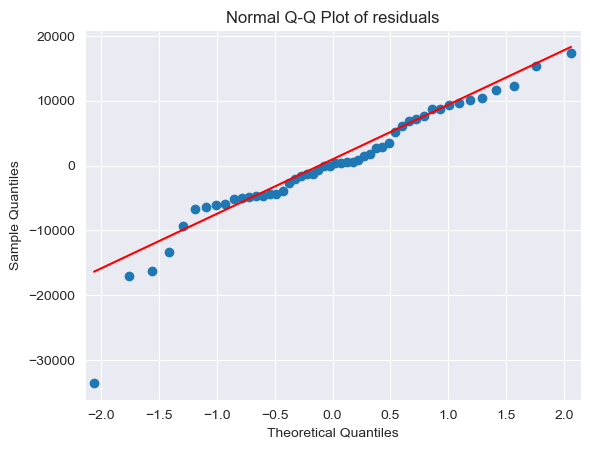

In [40]:
qqplot=sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q Plot of residuals")
plt.show()

In [41]:
list(np.where(model.resid<-3000))

[array([ 4,  5,  7,  9, 14, 15, 17, 18, 21, 22, 24, 26, 27, 46, 47, 48, 49],
       dtype=int64)]

## Residuals vs Regressor

eval_env: 1


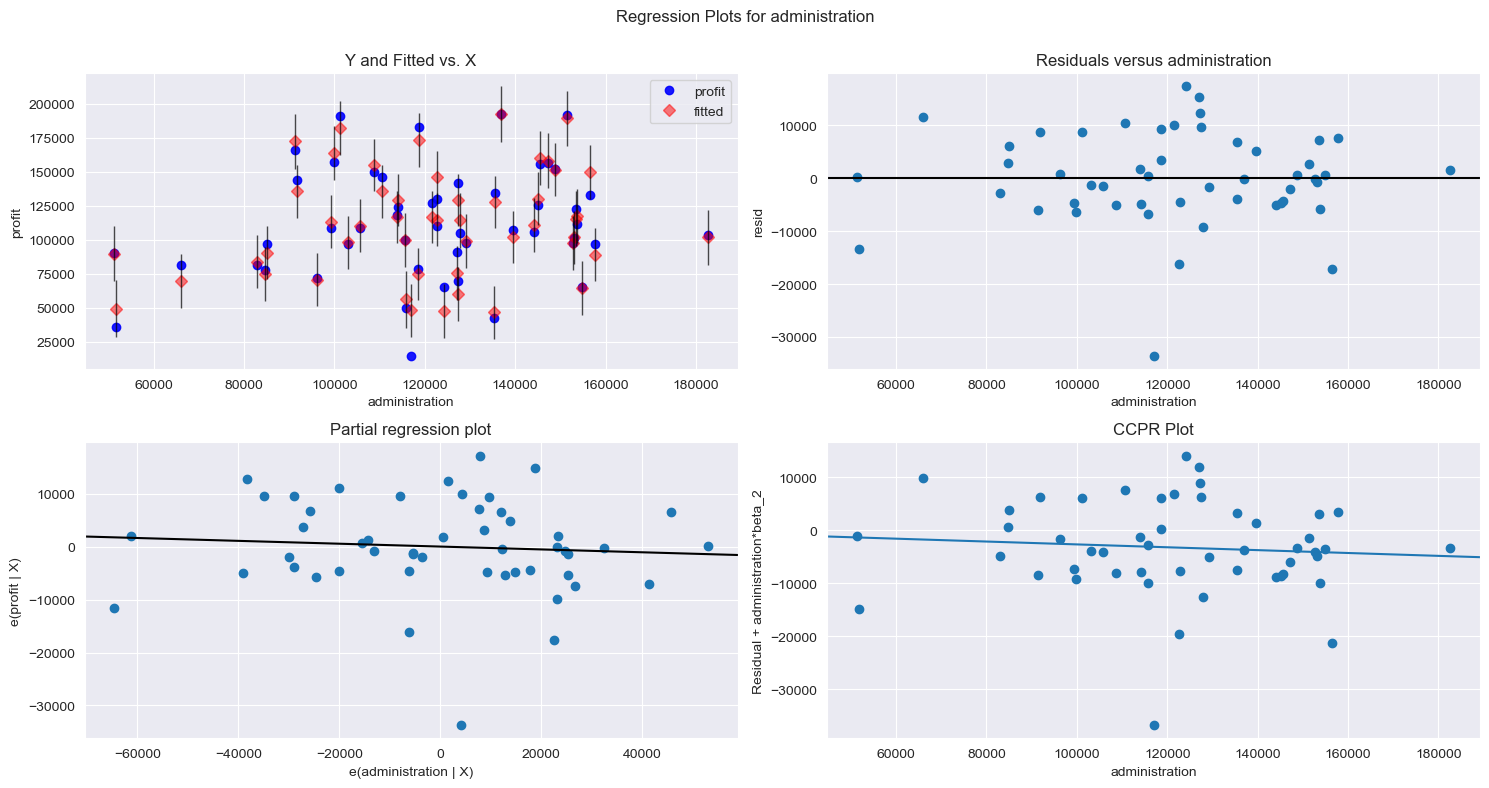

In [43]:
fig=plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, "administration", fig=fig)
plt.show()

eval_env: 1


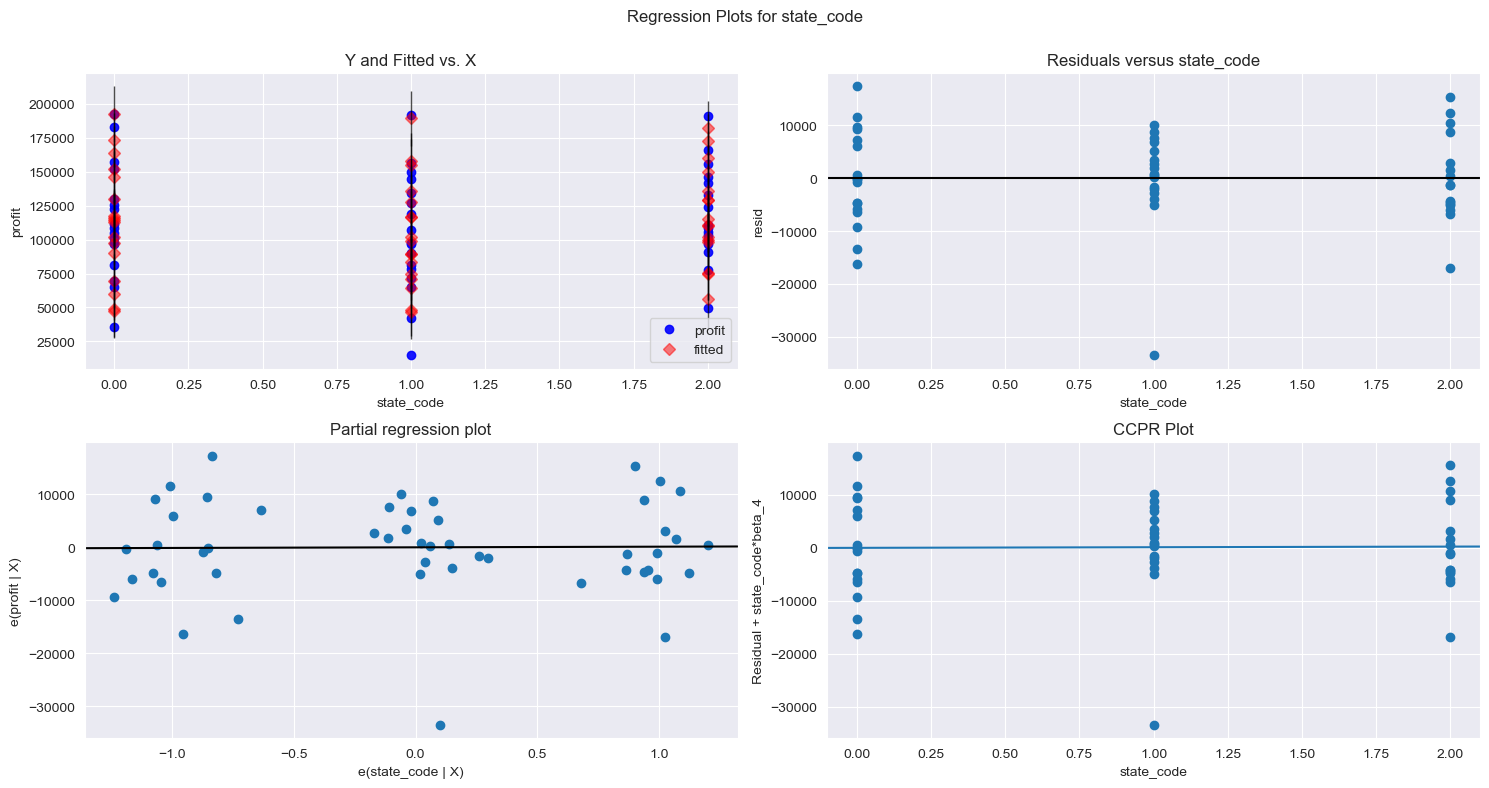

In [44]:
fig=plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, "state_code", fig=fig)
plt.show()

eval_env: 1


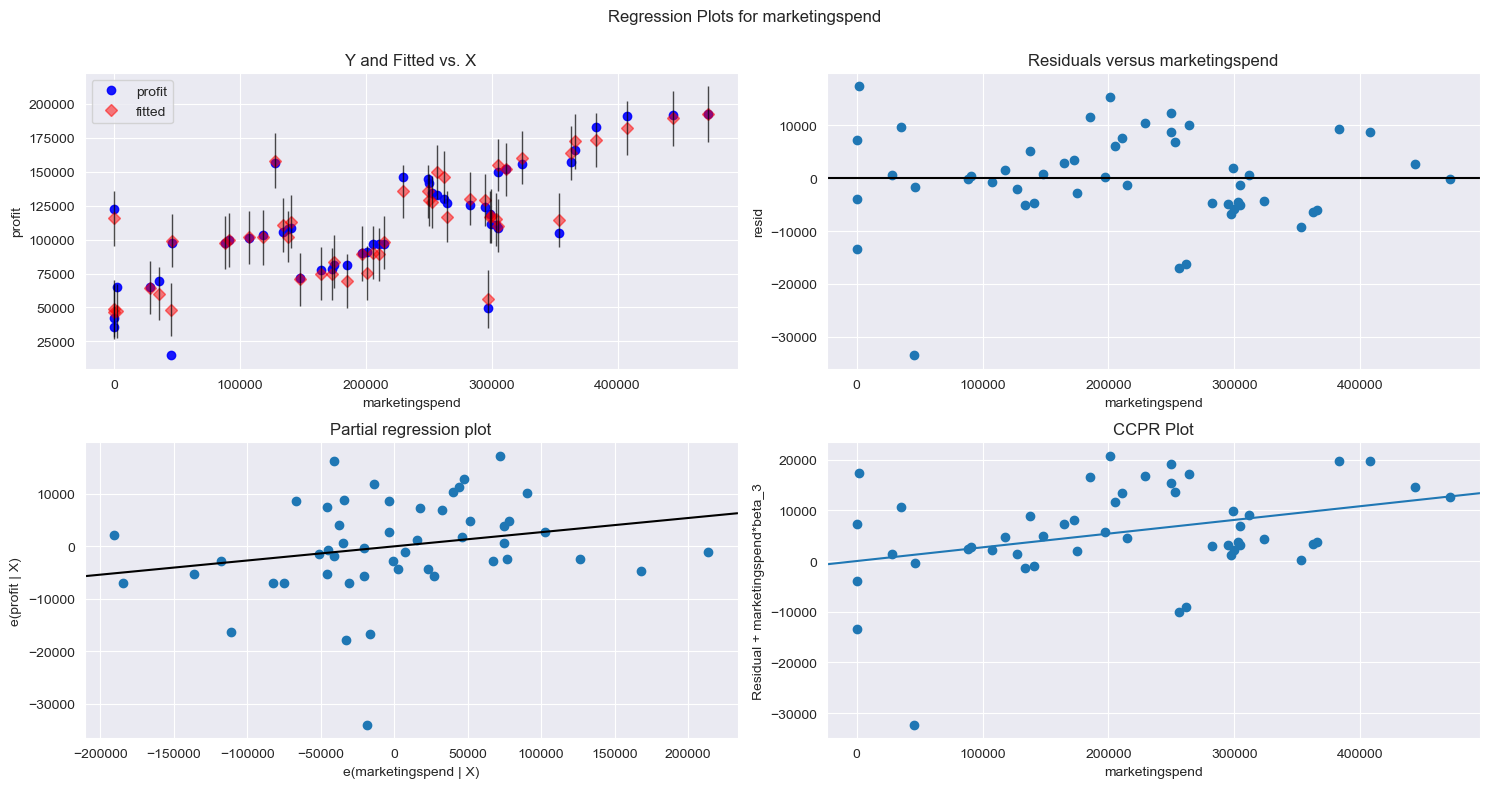

In [45]:
fig=plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, "marketingspend", fig=fig)
plt.show()

eval_env: 1


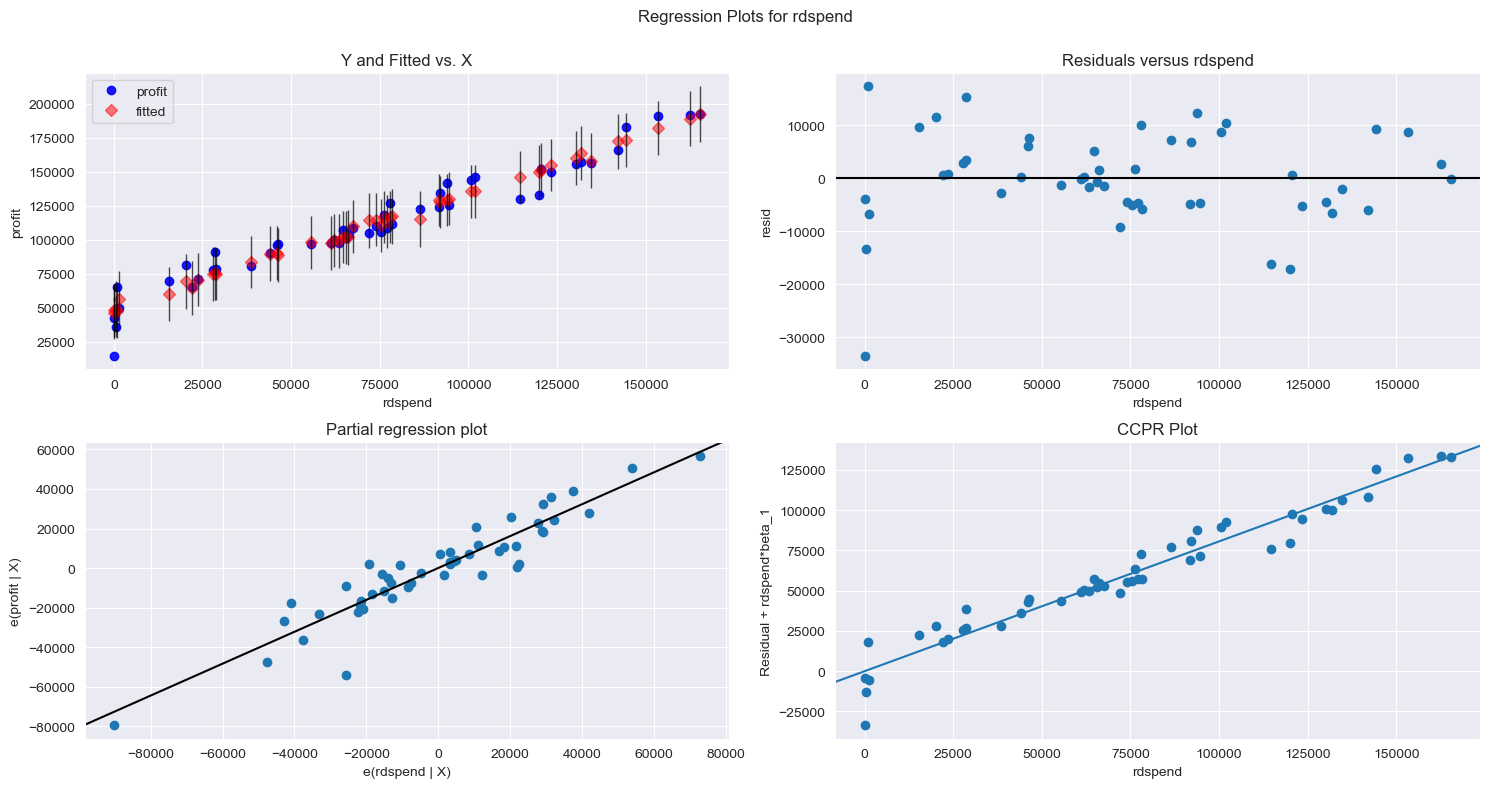

In [46]:
fig=plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, "rdspend", fig=fig)
plt.show()

## model deletion diagnostics

## Detecting Influencers/outliers

## Cook's Distance

In [47]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

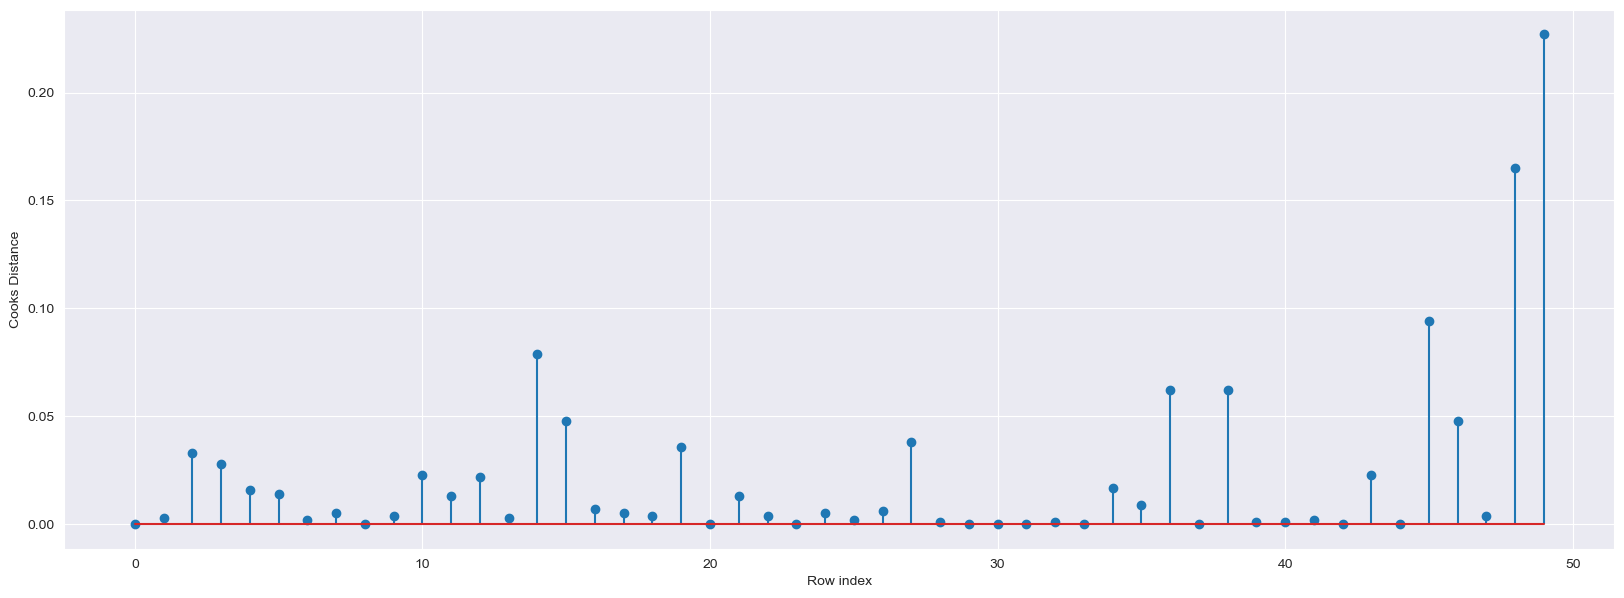

In [48]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
(np.argmax(c),np.max(c))

(49, 0.22675297053675428)

## High Influence points

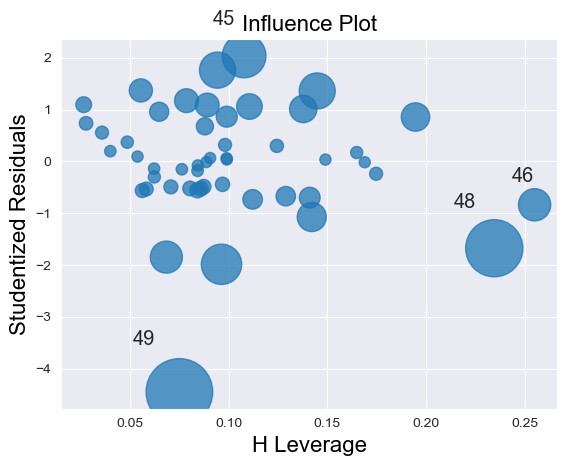

In [50]:
influence_plot(model)
plt.show()

In [51]:
k = 4 
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.30000000000000004

## from above plot it is clear that 49th observation is outlier

In [52]:
startup[startup.index.isin([49])]

,rdspend,administration,marketingspend,profit,state_code
49,0.0,116983.8,45173.06,14681.4,1


## Improving the model

In [54]:
startup_new= pd.read_csv('50_Startups.csv')

In [55]:
startup1= startup_new.drop(startup_new.index[49], axis=0).reset_index()

In [56]:
startup1=startup1.drop(['index'],axis=1)

In [57]:
startup1

,rdspend,administration,marketingspend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Build Model

In [58]:
#Excluding marketing and state_code
final_ml_a=smf.ols('profit~rdspend+administration',data=startup).fit()

In [59]:
(final_ml_a.rsquared, final_ml_a.aic, final_ml_a.bic)

(0.9478129385009173, 1059.6636934567293, 1065.3997624730139)

In [60]:
#Excluding administration and state_code
final_ml_m= smf.ols('profit~rdspend+marketingspend', data=startup).fit()

In [61]:
(final_ml_m.rsquared, final_ml_m.aic, final_ml_m.bic)

(0.9504503015559763, 1057.070772191826, 1062.8068412081107)

In [62]:
final_ml_s= smf.ols('profit~rdspend+state_code', data=startup).fit()

In [63]:
(final_ml_s.rsquared, final_ml_s.aic, final_ml_s.bic)

(0.9466693579811024, 1060.7475166059194, 1066.483585622204)

By comparing Rsquare and AIC values, model "final_ml_m" has high Rsquare and low AIC value include variable "marketingspend"
so that multicollinearity problem would be resolved 

## cook's distance

In [64]:
model_influence_m = final_ml_m.get_influence()
(c_m, _) = model_influence_m.cooks_distance

In [65]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_m,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

Text(0, 0.5, 'Cooks Distance')

In [67]:
(np.argmax(c_m),np.max(c_m))

(49, 0.3894886227924922)

In [69]:
#build model on new data
final_ml_m= smf.ols('profit~rdspend+marketingspend', data=startup1).fit()

In [70]:
model_influence_m = final_ml_m.get_influence()
(c_m, _) = model_influence_m.cooks_distance

In [71]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c_m,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

Text(0, 0.5, 'Cooks Distance')

In [72]:
(np.argmax(c_m),np.max(c_m))

(46, 0.1833755649133863)

In [74]:
startup2= startup1.drop(startup1.index[46],axis=0).reset_index()

In [75]:
startup2

,index,rdspend,administration,marketingspend,state,profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [76]:
startup3=startup2.drop(['index'], axis=1)

## hence finalizing the model

In [77]:
final_ml_m=smf.ols('profit~rdspend+marketingspend', data=startup3).fit()

In [78]:
(final_ml_m.rsquared, final_ml_m.aic)

(0.9603203117008039, 997.1027715983952)

In [79]:
model_influence_m=final_ml_m.get_influence()
(c_m,_)= model_influence_m.cooks_distance

In [80]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_m,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

Text(0, 0.5, 'Cooks Distance')

In [81]:
(np.argmax(c_m),np.max(c_m))

(47, 0.14544403432423783)

## Predicting new data

In [82]:
new_data= pd.DataFrame({'rdspend':130000,'admintration':120000,'marketingspend':450000,'state_code':1}, index=[1])

In [83]:
final_ml_m.predict(new_data)

1    163704.171589
dtype: float64

In [84]:
final_ml_m.predict(startup_new.iloc[0:5,])

0    191028.251047
1    187977.734719
2    179830.836647
3    172145.393688
4    169843.118321
dtype: float64

In [85]:
pred_y=final_ml_m.predict(startup_new)

In [86]:
pred_y

0     191028.251047
1     187977.734719
2     179830.836647
3     172145.393688
4     169843.118321
5     162040.951129
6     155805.138799
7     159479.992453
8     151718.663406
9     153582.513356
10    134815.502976
11    134609.069122
12    129497.804546
13    128191.610943
14    149325.166518
15    145439.342175
16    118101.765857
17    131248.348285
18    129499.132977
19    115094.127903
20    117990.493645
21    119632.689376
22    116457.379523
23    111653.953439
24    113008.544071
25    103616.570501
26    111489.943340
27    116798.451146
28    103959.580378
29    103236.199622
30     99958.922316
31     99211.545103
32     99432.770999
33     99431.206044
34     92483.707404
35     91987.940930
36     78798.845834
37     90228.109967
38     71903.330859
39     85310.723035
40     77867.696153
41     76926.962409
42     73151.836545
43     63073.824748
44     67832.204919
45     50990.609240
46     61638.977345
47     50172.046515
48     50579.257073
49     51765.220587
